<a href="https://colab.research.google.com/github/ritigupta07/CNN-Suit-Detection-on-a-playing-card/blob/master/SuitDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['training_set.zip']), "r")
zf.extractall()

Saving training_set.zip to training_set.zip


In [2]:
from google.colab import files
uploaded = files.upload()
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['test_set.zip']), "r")
zf.extractall()

Saving test_set.zip to test_set.zip


In [0]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

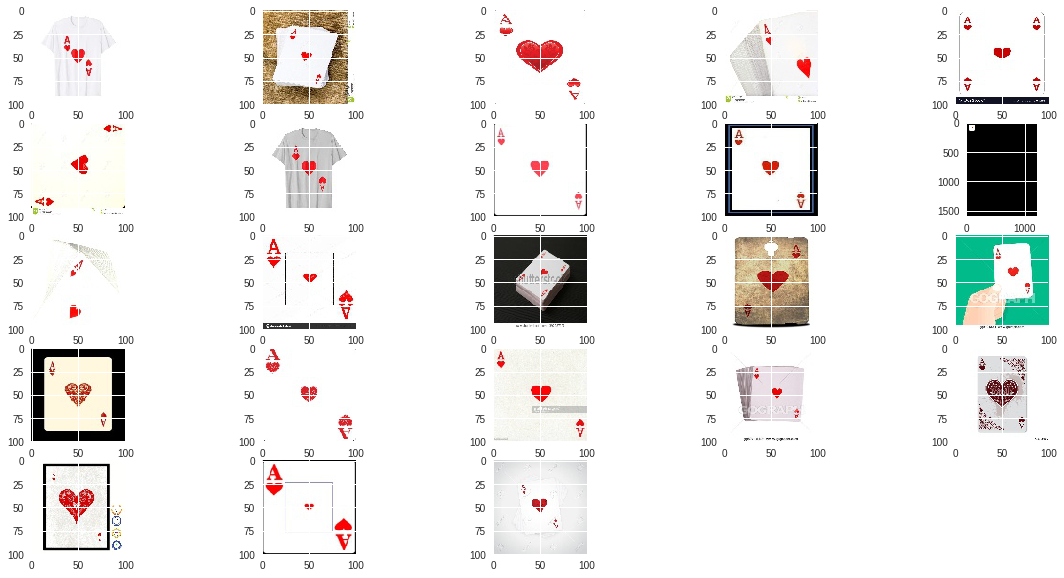

In [18]:
# view training dataset
images = []
for img_path in glob.glob('training_set/Ace_Heart/*.jpg'):
    images.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 4, activation = 'softmax'))

In [0]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 116 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [0]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [24]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 20,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 100)

Epoch 1/20
100/100 [==============================] - 15s 147ms/step - loss: 1.1132 - acc: 0.4895 - val_loss: 1.2389 - val_acc: 0.4500

Epoch 00001: val_acc improved from -inf to 0.45000, saving model to best_weights.hdf5
Epoch 2/20
100/100 [==============================] - 13s 133ms/step - loss: 0.3906 - acc: 0.8349 - val_loss: 2.3631 - val_acc: 0.6000

Epoch 00002: val_acc improved from 0.45000 to 0.60000, saving model to best_weights.hdf5
Epoch 3/20
100/100 [==============================] - 14s 135ms/step - loss: 0.1830 - acc: 0.9362 - val_loss: 2.7644 - val_acc: 0.6500

Epoch 00003: val_acc improved from 0.60000 to 0.65000, saving model to best_weights.hdf5
Epoch 4/20
100/100 [==============================] - 13s 135ms/step - loss: 0.0988 - acc: 0.9537 - val_loss: 3.5450 - val_acc: 0.6000

Epoch 00004: val_acc did not improve from 0.65000
Epoch 5/20
100/100 [==============================] - 13s 134ms/step - loss: 0.1521 - acc: 0.9363 - val_loss: 2.1099 - val_acc: 0.7000

Epoch 

In [0]:
classifier.load_weights('best_weights.hdf5')

In [0]:
classifier.save('shapes_cnn.h5')

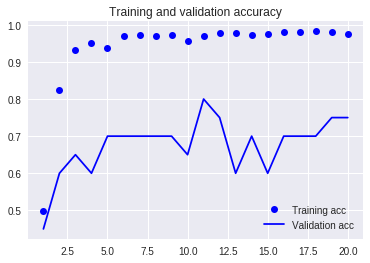

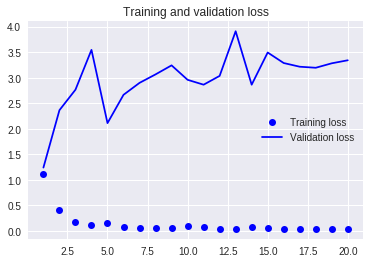

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

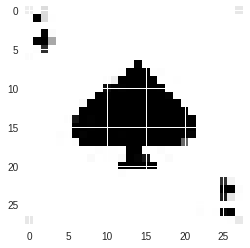

(1, 28, 28, 3)


In [28]:
#VERIFY IF SUIT BEING DETECTED BY THE CNN
import keras
img_path = 'test_set/Ace_Spade/img31.jpg'

img = keras.preprocessing.image.load_img(img_path, target_size=(28, 28))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)


In [29]:
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)
#0 --> Club, 1 --> Diamond, 2 --> Heart, 3 --> Spade

Predicted class is: [3]


In [0]:
layer_outputs = [layer.output for layer in classifier.layers[:7]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


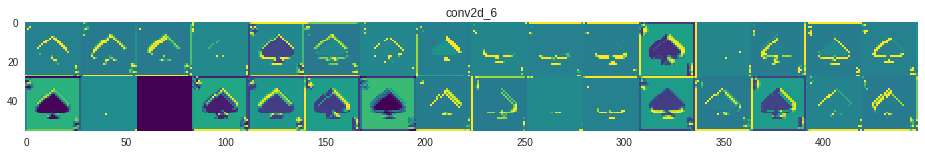

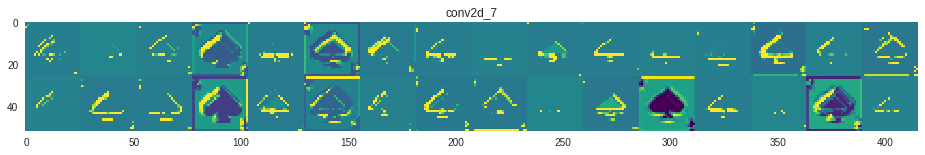

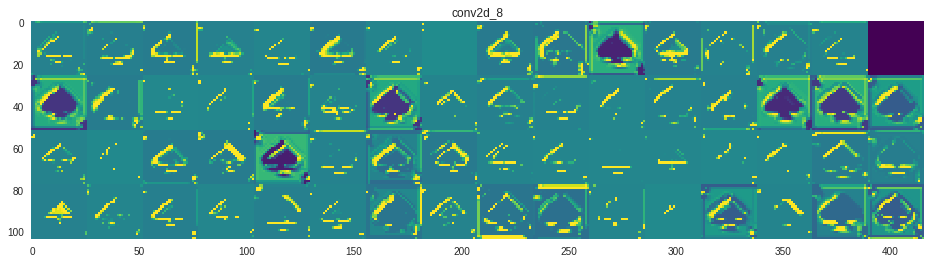

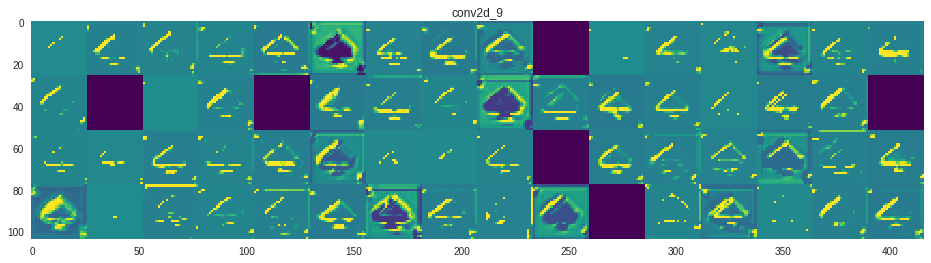

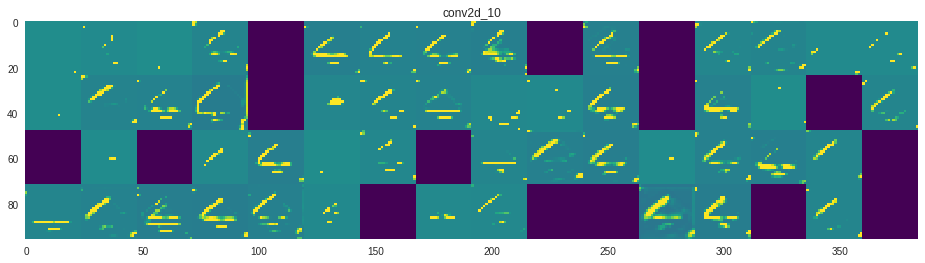

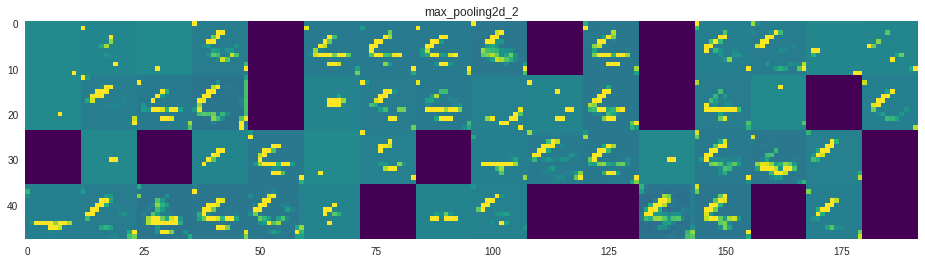

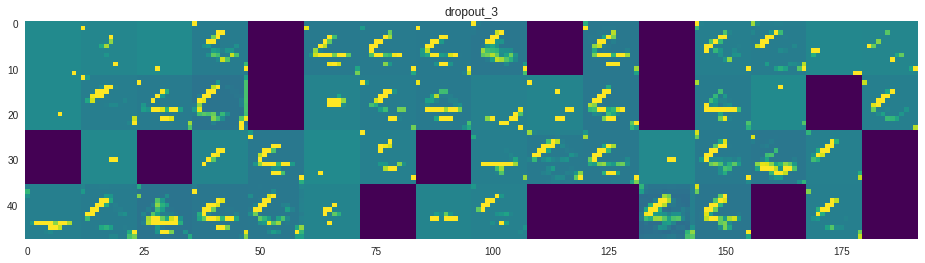

In [32]:
# visualze activation by all the layers in the network

layer_names = []
for layer in classifier.layers[:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

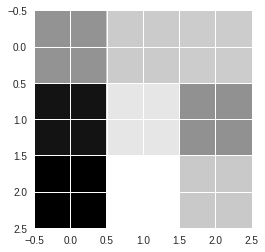

In [33]:
# Visualize the filters
top_layer = classifier.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, 0, 29].squeeze(), cmap='gray')